# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

# Build query URL
#for city in cities: 

    units="imperial"
    city_url = url + "appid=" + weather_api_key  + "&units=" + units  + "&q="+ city 

    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        #city_date=pd.to_pydatetime()
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                         "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data ret complete")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=praia da vitoria
Processing Record 1 of Set 1 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=busselton
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=mataura
Processing Record 3 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=khatanga
Processing Record 4 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=komatipoort
Processing Record 5 of Set 1 | komatipoort
http://api.openweathermap.org/data/2.5/weather?appid=015dcfcd366961a2d72250f2c3f9280c&units=imperial&q=along
Processing Record 6 of Set 1 | along
http://api.o

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df['Datetime'] = pd.to_datetime(city_data_df['Date'],unit='s')
# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
Datetime      549
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Datetime
0,praia da vitoria,38.7333,-27.0667,61.05,82,75,16.46,PT,1675648992,2023-02-06 02:03:12
1,busselton,-33.6500,115.3333,75.99,55,0,12.35,AU,1675648993,2023-02-06 02:03:13
2,mataura,-46.1927,168.8643,66.56,57,98,11.48,NZ,1675648993,2023-02-06 02:03:13
3,khatanga,71.9667,102.5000,-34.53,100,48,6.49,RU,1675648994,2023-02-06 02:03:14
4,komatipoort,-25.4332,31.9548,72.05,92,68,5.30,ZA,1675648995,2023-02-06 02:03:15


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Datetime
City_ID,,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,61.05,82,75,16.46,PT,1675648992,2023-02-06 02:03:12
1,busselton,-33.6500,115.3333,75.99,55,0,12.35,AU,1675648993,2023-02-06 02:03:13
2,mataura,-46.1927,168.8643,66.56,57,98,11.48,NZ,1675648993,2023-02-06 02:03:13
3,khatanga,71.9667,102.5000,-34.53,100,48,6.49,RU,1675648994,2023-02-06 02:03:14
4,komatipoort,-25.4332,31.9548,72.05,92,68,5.30,ZA,1675648995,2023-02-06 02:03:15


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

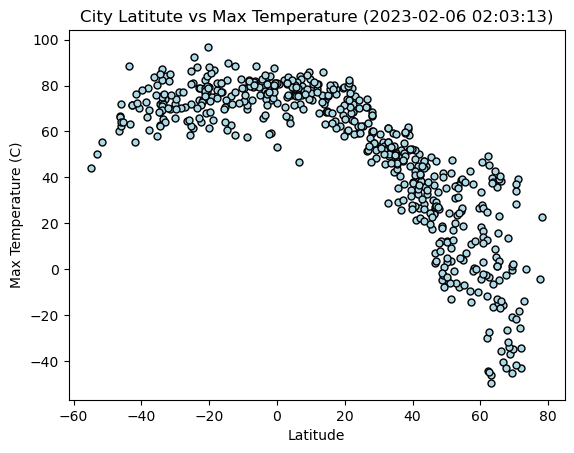

In [47]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp", c='lightblue', s= 25,
            edgecolors="black")

# Incorporate the other graph properties
date=city_data_df.iloc[1,9]

plt.title(f'City Latitute vs Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

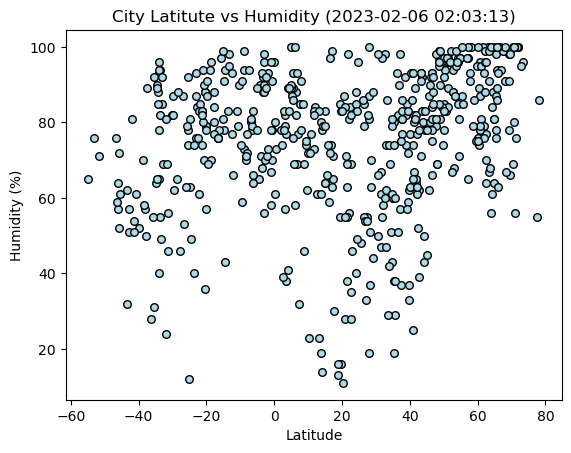

In [48]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity", c='lightblue', s= 30,
            edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitute vs Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

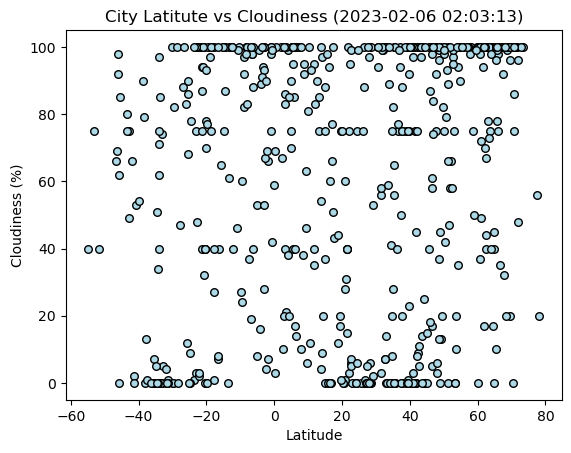

In [49]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness", c='lightblue', s= 30,
            edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitute vs Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

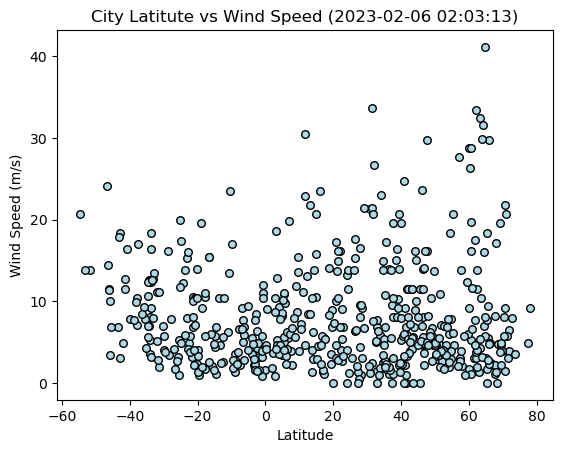

In [50]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed", c='lightblue', s= 30,
            edgecolors="black")

# Incorporate the other graph properties
plt.title(f'City Latitute vs Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.609867966955231


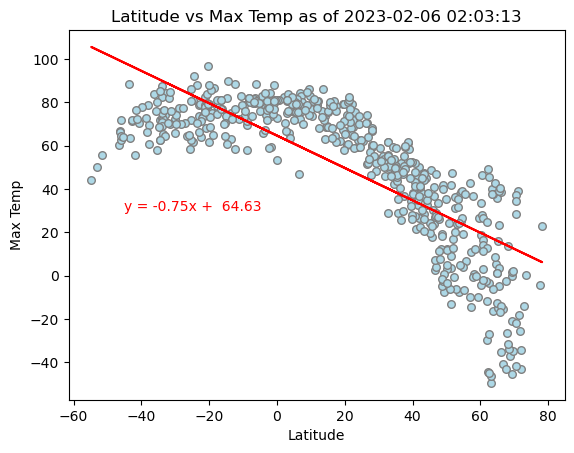

The r-squared is: 0.04825816661028074


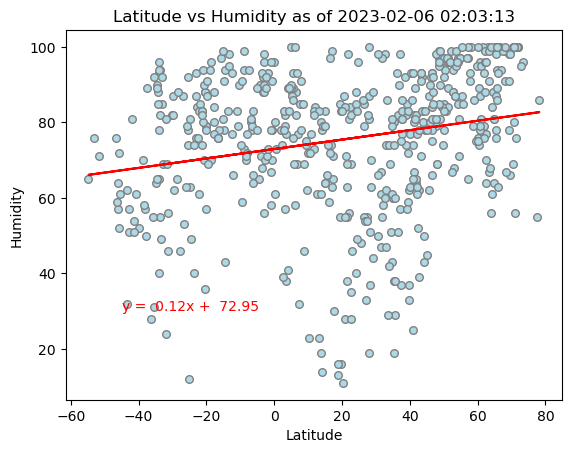

The r-squared is: 0.025953742786778623


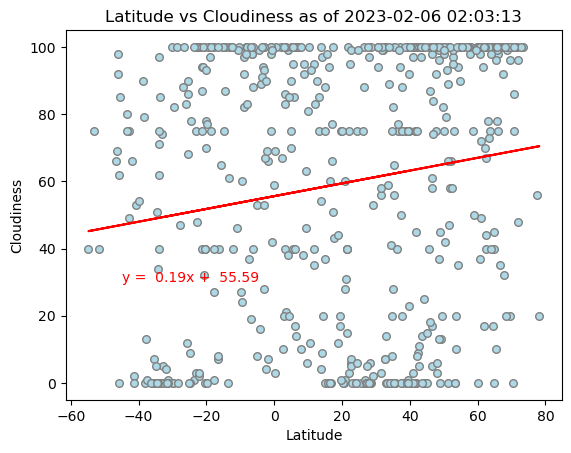

The r-squared is: 3.059583933072269e-05


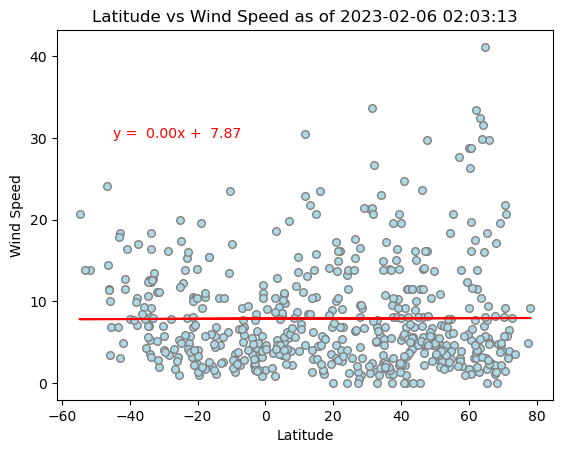

In [52]:
# Define a function to create Linear Regression plots

indicators=["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

for indicator in indicators:
    x_val = city_data_df["Lat"]
    y_val = city_data_df[indicator]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regression = x_val * slope + intercept
    line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"

    plt.scatter(x_val,y_val,c='lightblue', s= 30, edgecolors="grey")
    plt.plot(x_val,regression,"r-")
    plt.annotate(line_eq, (-45,30), fontsize=10,color="red")
    plt.title(f'Latitude vs {indicator} as of {date}')
    plt.xlabel('Latitude')
    plt.ylabel(f"{indicator}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Datetime
City_ID,,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,61.05,82,75,16.46,PT,1675648992,2023-02-06 02:03:12
3,khatanga,71.9667,102.5000,-34.53,100,48,6.49,RU,1675648994,2023-02-06 02:03:14
5,along,28.1667,94.7667,59.27,51,6,1.01,IN,1675648995,2023-02-06 02:03:15
7,nome,64.5011,-165.4064,5.43,88,17,6.96,US,1675648909,2023-02-06 02:01:49
8,sur,22.5667,59.5289,69.49,69,6,5.32,OM,1675648996,2023-02-06 02:03:16


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Datetime
City_ID,,,,,,,,,,
1,busselton,-33.6500,115.3333,75.99,55,0,12.35,AU,1675648993,2023-02-06 02:03:13
2,mataura,-46.1927,168.8643,66.56,57,98,11.48,NZ,1675648993,2023-02-06 02:03:13
4,komatipoort,-25.4332,31.9548,72.05,92,68,5.30,ZA,1675648995,2023-02-06 02:03:15
6,hobart,-42.8794,147.3294,71.46,51,75,18.41,AU,1675648482,2023-02-06 01:54:42
10,hermanus,-34.4187,19.2345,71.80,88,34,12.57,ZA,1675648998,2023-02-06 02:03:18


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7415582088842568


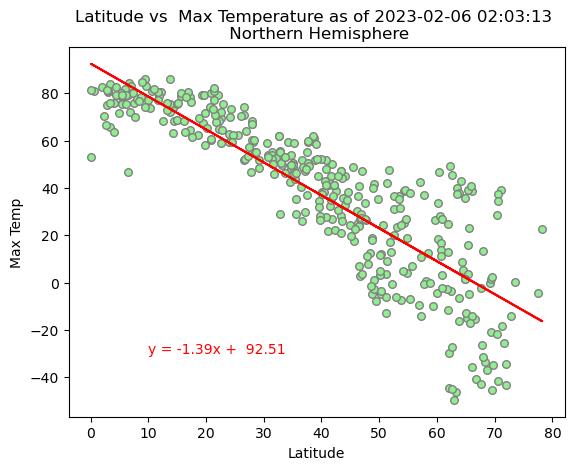

In [63]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (10,-30), fontsize=10,color="red")
plt.title(f'Latitude vs  Max Temperature as of {date} \n Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.13492930764689504


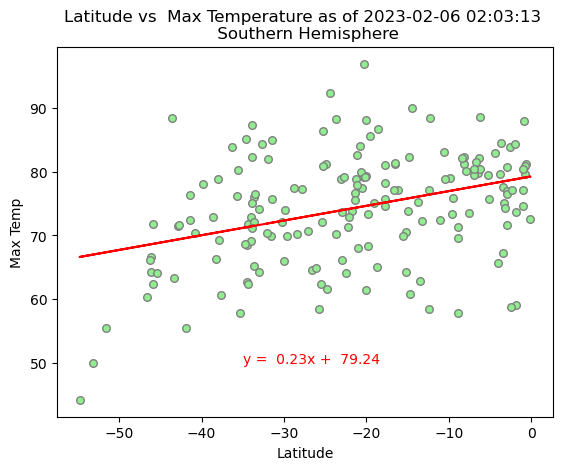

In [62]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (-35,50), fontsize=10,color="red")
plt.title(f'Latitude vs  Max Temperature as of {date} \n Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13282395128306523


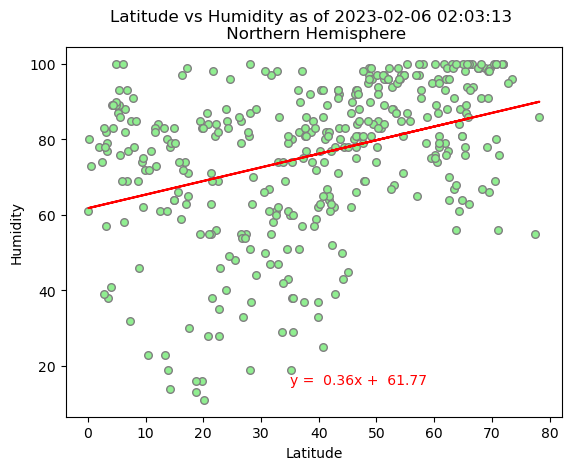

In [61]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (35,15), fontsize=10,color="red")
plt.title(f'Latitude vs Humidity as of {date} \n Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Humidity")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1400287909509295


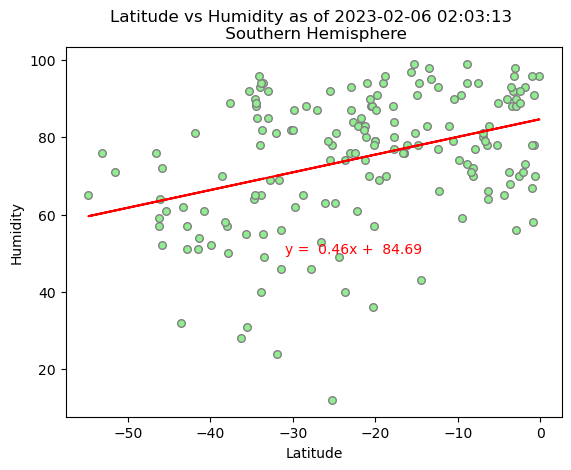

In [64]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (-31,50), fontsize=10,color="red")
plt.title(f'Latitude vs Humidity as of {date} \n Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Humidity")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03765959880075852


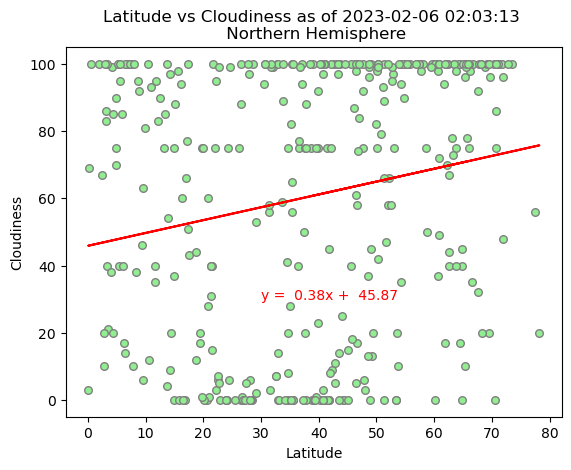

In [65]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (30,30), fontsize=10,color="red")
plt.title(f'Latitude vs Cloudiness as of {date} \n Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09972476294960947


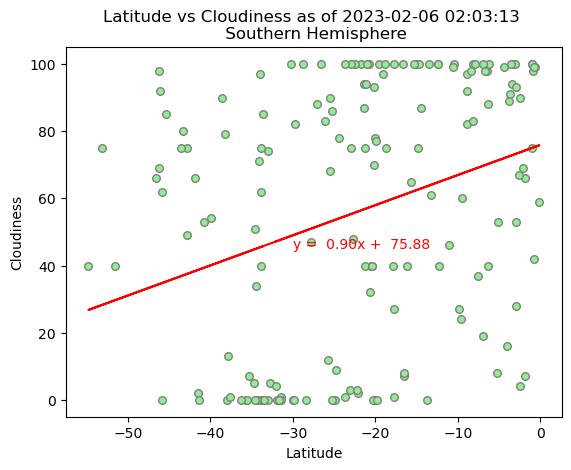

In [66]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (-30,45), fontsize=10,color="red")
plt.title(f'Latitude vs Cloudiness as of {date} \n Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0010715277553397205


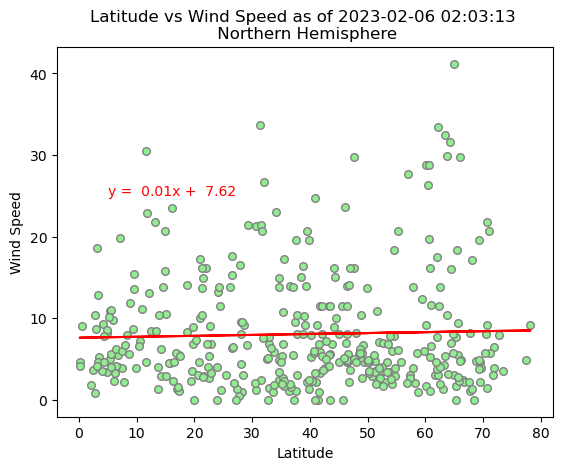

In [67]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (5,25), fontsize=10,color="red")
plt.title(f'Latitude vs Wind Speed as of {date} \n Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17369883323603894


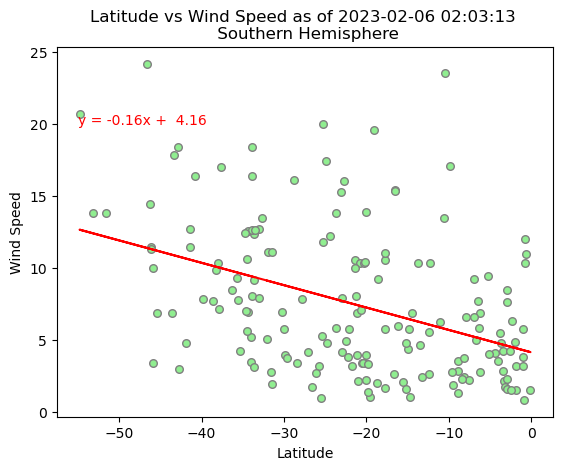

In [68]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept
line_eq = "y = " + f"{slope : .2f}" + "x + " + f"{intercept : .2f}"
   
plt.scatter(x_val,y_val,c='lightgreen', s= 30,
            edgecolors="grey")
plt.plot(x_val,regression,"r-")    
plt.annotate(line_eq, (-55,20), fontsize=10,color="red")
plt.title(f'Latitude vs Wind Speed as of {date} \n Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE